# Example of volume calculations

A volume is computed through the whole domain between 2 surfaces, called upper and lower values in this document.

Typical calculations involve the following variables:

<table>
	<tr>
		<th>Upper values</th>
		<th>Lower values</th>
		<th>Interpretation</th>
	</tr>
	<tr>
		<td>WATER DEPTH</td>
		<td>0</td>
		<td rowspan="2">Liquid volume</td>
	</tr>
	<tr>
		<td>FREE SURFACE</td>
		<td>BOTTOM</td>
	</tr>
	<tr>
		<td>BOTTOM</td>
		<td>RIGID BED</td>
		<td>Solid volume</td>
	</tr>
	<tr>
		<td>BOTTOM</td>
		<td>initial values</td>
		<td>Solid volume from beginning</td>
	</tr>
	<tr>
		<td>BED SHEAR STRESS</td>
		<td>0</td>
		<td>Bottom friction force (approx.)</td>
	</tr>
</table>

Below are the data and imports you will need for the exercices.

In [7]:
from os import environ, path
import matplotlib.pyplot as plt
import numpy as np

from data_manip.extraction.telemac_file import TelemacFile
from postel.plot1d import plot1d

# Path to result file
res_path = path.join(environ['HOMETEL'], 'notebooks', 'workshop', 'data', 'r2d_tide-ES_VE95.slf')
sis_path = path.join(environ['HOMETEL'], 'notebooks', 'workshop', 'data', 'sis_bosse-t2d.slf')

## Exo1 : Initial liquid volume

Compute initial liquid volume for the example file `r2d_tide-ES_VE95.slf`.

In [8]:
from data_manip.computation.volume import volume_calculation
from data_manip.extraction.telemac_file import TelemacFile

# defining the timestep index of extraction
record = 0

# loading the 2D results file in an object TelemacFile
res = TelemacFile(res_path)

# extracting connectivity array
ikle = res.get_mesh_connectivity()

# extracting water depth from the results file 
depth = res.get_data_value("HAUTEUR D'EAU", record)

# extracting x and y coordinates from the results file
coord_x = res.get_mesh_coord(1)
coord_y = res.get_mesh_coord(2)

# Calculating the volume of water
volume_init, _, _ = volume_calculation(ikle, depth, coord_x, coord_y)

print("Initial liquid volume = %f Mm3" % (volume_init/1.0e6))

Initial liquid volume = 77576.289859 Mm3


## Exo2 : Temporal evolution of liquid volume

Plot temporal evolution of liquid volume for the example file `r2d_tide-ES_VE95.slf`.

The variable is called `HAUTEUR D'EAU`. Recommended units are hours for time and Mm³ for volume.

Volume at record 0: 77576.289859 Mm3
Volume at record 1: 77359.356053 Mm3
Volume at record 2: 77269.749475 Mm3
Volume at record 3: 77278.532550 Mm3
Volume at record 4: 76687.575338 Mm3
Volume at record 5: 75886.674871 Mm3
Volume at record 6: 74962.964433 Mm3
Volume at record 7: 73901.789998 Mm3
Volume at record 8: 72869.000580 Mm3
Volume at record 9: 71921.165223 Mm3
Volume at record 10: 71037.002395 Mm3
Volume at record 11: 70053.236513 Mm3
Volume at record 12: 69028.925287 Mm3
Volume at record 13: 68018.353987 Mm3
Volume at record 14: 67004.757365 Mm3
Volume at record 15: 66052.728716 Mm3
Volume at record 16: 65220.244383 Mm3
Volume at record 17: 64508.742925 Mm3
Volume at record 18: 63884.884550 Mm3
Volume at record 19: 63341.153795 Mm3
Volume at record 20: 62887.444017 Mm3
Volume at record 21: 62510.414425 Mm3
Volume at record 22: 62209.798016 Mm3
Volume at record 23: 62008.334601 Mm3
Volume at record 24: 61916.935798 Mm3
Volume at record 25: 61932.353105 Mm3
Volume at record 26: 6

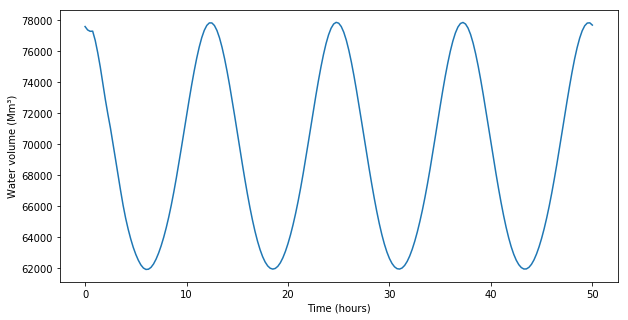

In [9]:
# Initialising figure and axis
fig, ax = plt.subplots(figsize=(10,5))

# Initialize two empty lists
times = []
volumes = []

for record in range(res.ntimestep):
    time = res.times[record]
    times.append(time)

    depth = res.get_data_value("HAUTEUR D'EAU", record)       
    volume, _, _ = volume_calculation(ikle, depth, coord_x, coord_y)
    volumes.append(volume)

    print("Volume at record %i: %f Mm3" % (record, volume/1e6))

plot1d(ax, np.array(times)/3600, np.array(volumes)/1e6,  # plot values with custom units
       x_label='Time (hours)', y_label='Water volume (Mm³)')
plt.show()

## Exo3 : Temporal evolution of solid volume

Plot temporal evolution of solid volume for the example file `sis_bosse-t2d.slf`.

The variable is called `BOTTOM`. Recommended units are minutes for time and m³ for volume.

In [10]:
# loading the 2D results file in an object TelemacFile
res = TelemacFile(sis_path)

# extracting connectivity array
ikle = res.get_mesh_connectivity()

# extracting x and y coordinates from the results file
coord_x = res.get_mesh_coord(1)
coord_y = res.get_mesh_coord(2)

Volume at record 0: 0.399989 m3
Volume at record 1: 0.399166 m3
Volume at record 2: 0.399160 m3
Volume at record 3: 0.399150 m3
Volume at record 4: 0.399139 m3
Volume at record 5: 0.399129 m3
Volume at record 6: 0.399119 m3
Volume at record 7: 0.399109 m3
Volume at record 8: 0.399099 m3
Volume at record 9: 0.399089 m3
Volume at record 10: 0.399079 m3
Volume at record 11: 0.399069 m3
Volume at record 12: 0.399059 m3
Volume at record 13: 0.399049 m3
Volume at record 14: 0.399038 m3
Volume at record 15: 0.399028 m3
Volume at record 16: 0.399018 m3
Volume at record 17: 0.399008 m3
Volume at record 18: 0.398998 m3
Volume at record 19: 0.398988 m3
Volume at record 20: 0.398978 m3
Volume at record 21: 0.398968 m3
Volume at record 22: 0.398958 m3
Volume at record 23: 0.398947 m3
Volume at record 24: 0.398937 m3
Volume at record 25: 0.398927 m3
Volume at record 26: 0.398917 m3
Volume at record 27: 0.398907 m3
Volume at record 28: 0.398897 m3
Volume at record 29: 0.398887 m3
Volume at record 30:

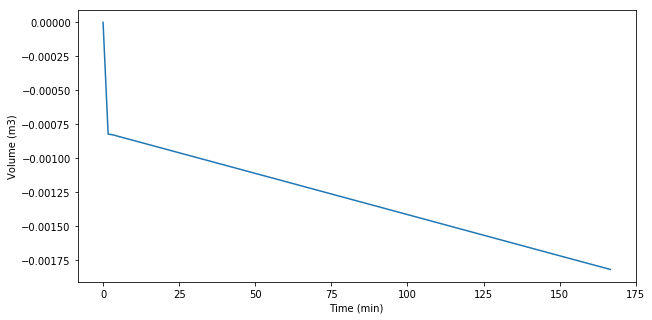

In [11]:
# Initialising figure and axis
fig, ax = plt.subplots(figsize=(10,5))

# Initialize two empty lists
times = []
volumes = []

for record in range(res.ntimestep):
    time = res.times[record]
    times.append(time)

    try:
        depth = res.get_data_value("BOTTOM", record)
    except TelemacException:
        pass  #FIXME: remove me if possible
        
    volume, _, _ = volume_calculation(ikle, depth, coord_x, coord_y)
    volumes.append(volume)

    print("Volume at record %i: %f m3" % (record, volume))

diff_volumes = np.array(volumes) - volumes[0]
plot1d(ax, np.array(times)/60, diff_volumes,  # plot values with custom units
       x_label='Time (min)', y_label='Volume (m3)')
plt.show()